<a href="https://colab.research.google.com/github/Yusra-Zafar/Machine-Learning-Classification/blob/main/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Tips dataset

In [ ]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib


#### My Learnings
- No. of males is greater than females, so more bill and tips were given by males.
- No noticeable difference in smoker vs non-smoker tippin behaviour.
- no lunch on weekends
- less dinner on thursday
- percentage of tip amount decreases with total_bill and table size.
- moderate positive correlation between total bill and tip amount.

#### My mistakes:
1. Model was showing 100% accuracy, precision and recall! :)
    - mistake: only specified train_size=200 and not the test_size.
    - problem: data leakage (model sees data during training that it should only see during testing).
    - solution: specified test_size=0.2
2. Was getting different metrics score everytime I run the code.
    - mistake: skipped random_state.
    - problem: different data splits were being used everytime.
    - solution: researched and used random_state.

## Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## 1. Understanding the tips dataset

In [ ]:
df=sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [ ]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [ ]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [ ]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
df.shape

(244, 7)

## 2. Understanding the shape and distribution

- Shape of total_bill is right skewed, meaning most of data points lie to the right side.
- Males have given more bill than females.

<Axes: xlabel='total_bill', ylabel='Count'>

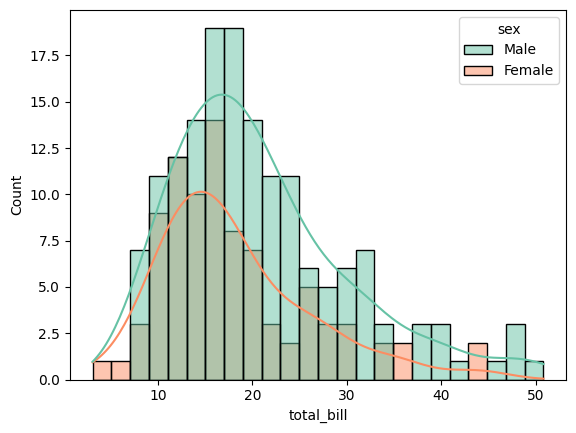

In [ ]:
sns.histplot(df, x='total_bill',hue='sex', binwidth=2, palette='Set2', kde=True)

- The highest tip count is between 2 and 2.5

<Axes: xlabel='tip', ylabel='Count'>

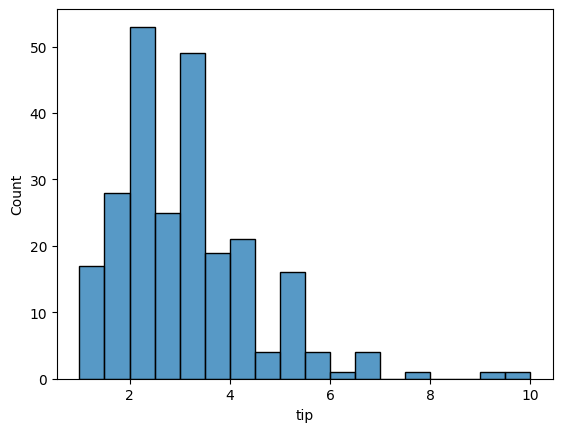

In [ ]:
sns.histplot(df['tip'])

In [ ]:
df['tip'].mean()

2.99827868852459

In [ ]:
df['total_bill'].mean()

19.78594262295082

- There is a **moderate to strong positive correlation** between tip and bill, means greater bill amounts result in greater tip amounts.

In [ ]:
# prompt: find correlation of tip and total_bill

df['tip'].corr(df['total_bill'])


0.6757341092113641

In [ ]:
# prompt: find correlation of only numerical features

numerical_features = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()

print(correlation_matrix)


            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


## 3. Exploratory Data Analysis

- General trend tells the positive correlation between tip and bill amount.
- Most bill amounts lie between 10 and 30.

<Axes: xlabel='total_bill', ylabel='tip'>

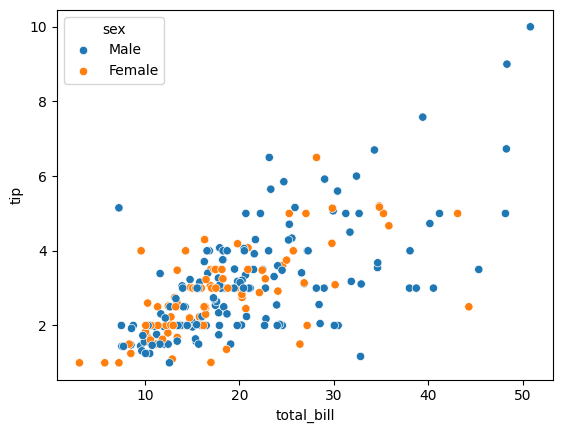

In [ ]:
sns.scatterplot(df, x='total_bill', y='tip', hue='sex')

In [ ]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

- Highest tips were given on sunday dinner.
- No lunches on weekends.

<Axes: xlabel='day', ylabel='tip'>

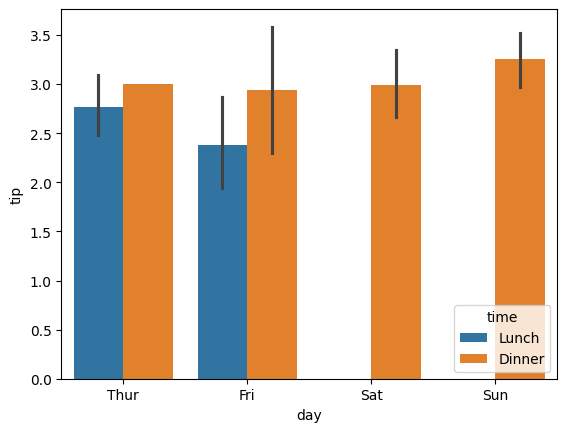

In [ ]:
sns.barplot(df, x='day', y='tip', hue='time')

In [ ]:
# prompt: give me the tip values for lunch time on sat and sun

lunch_sat_sun = df[(df['day'].isin(['Sat', 'Sun'])) & (df['time'] == 'Lunch')]
lunch_sat_sun['tip']


Series([], Name: tip, dtype: float64)

- Not much difference between smokers and non-smokers tipping behaviour

<Axes: xlabel='smoker', ylabel='tip'>

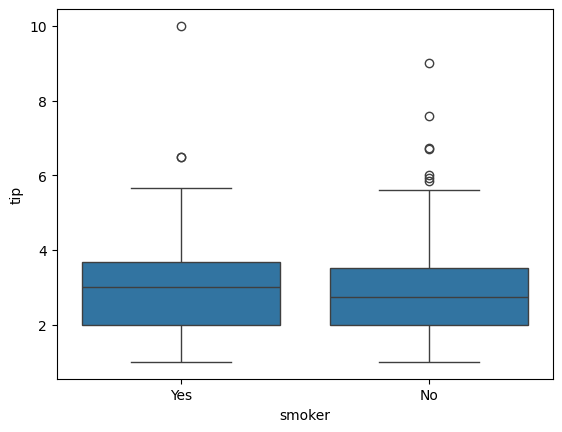

In [ ]:
# prompt: plot a graph showing the difference in tipping behaviour in smoker vs non smoker

sns.boxplot(data=df, x="smoker", y="tip")


- Tip amount is increasing with table size, because more people will have ordered more meal, resulting in greater total bill, which is positively correlated with tip.

<Axes: xlabel='size', ylabel='tip'>

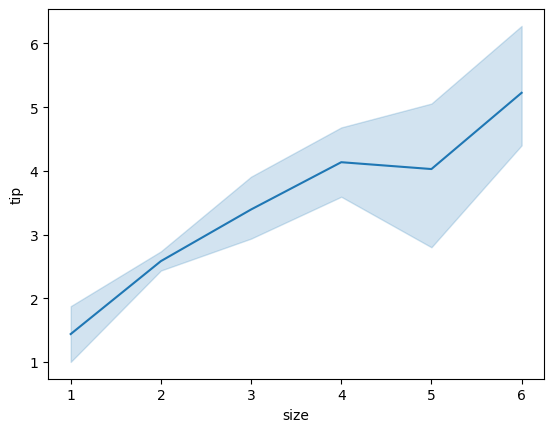

In [ ]:
sns.lineplot(df, x='size', y='tip')

- Adding a new column tip percentage, to see the trend.

In [ ]:
# prompt: add a new column 'tip_percent' with tip percentages

df['tip_percent'] = df['tip'] / df['total_bill'] * 100
df.head()


,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Tip amount was increasing with table size, but percentage of tip is decreasing with respect to total bill and table size.

<Axes: xlabel='size', ylabel='tip_percent'>

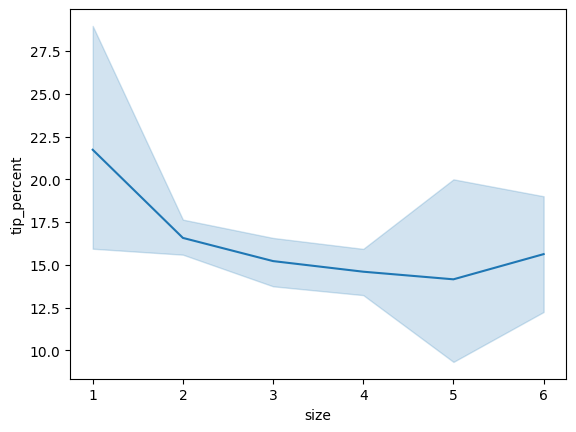

In [ ]:
sns.lineplot(df, x='size', y='tip_percent')

<Axes: xlabel='total_bill', ylabel='tip_percent'>

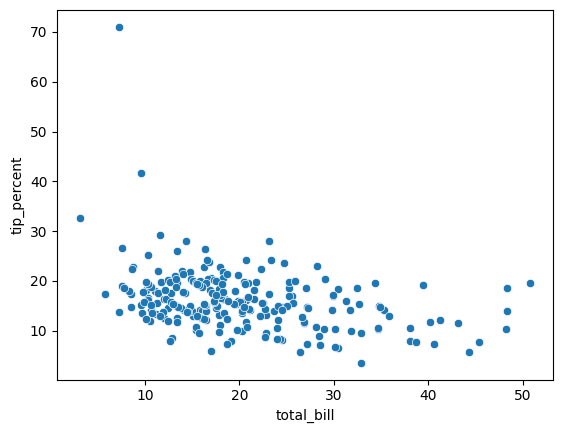

In [ ]:
sns.scatterplot(df, x='total_bill', y='tip_percent')

Increased total bill and tips on weekend dinners, because generally more people hang out on weekend nights.

<Axes: xlabel='day', ylabel='tip'>

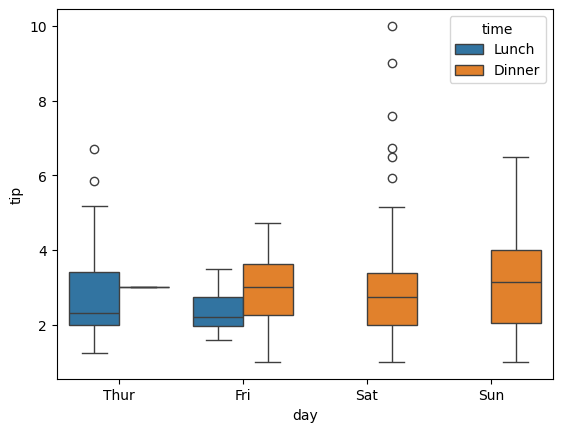

In [ ]:
sns.boxplot(df, x='day', y='tip', hue='time')

<Axes: xlabel='day', ylabel='total_bill'>

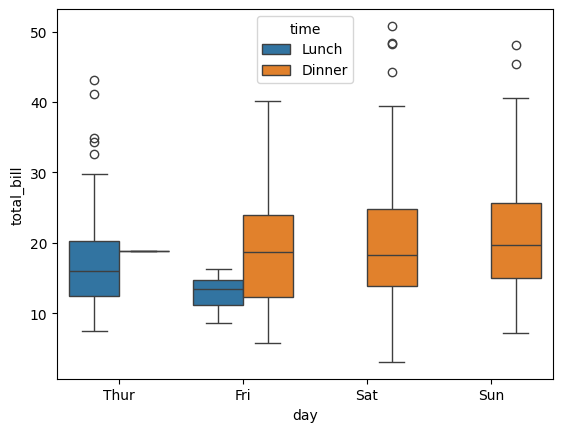

In [ ]:
sns.boxplot(df, x='day', y='total_bill', hue='time')

## 4. Data transformation

#### Goal: Binary classification.
- Target variable: time.

To predict the time of day i.e dinner or lunch so the business can arrange the stock and meals accordingly

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


<Axes: xlabel='time', ylabel='Count'>

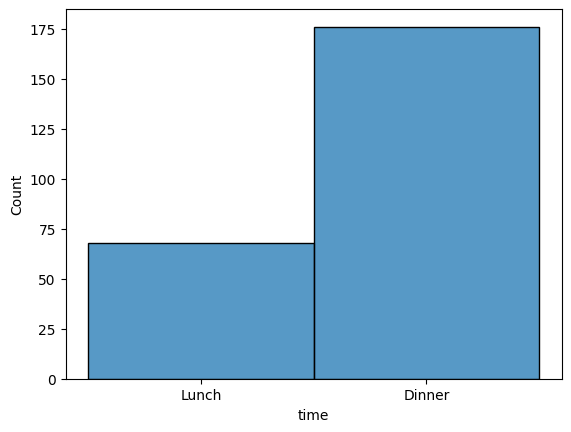

In [ ]:
sns.histplot(df['time'])

In [ ]:
# prompt: give me total count of dinner and lunch values in df

df['time'].value_counts()


time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [ ]:
# prompt: use label encoding to convert sex, smoker, day, time into 1 and 0

# Label encoding for sex
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# Label encoding for smoker
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)

# Label encoding for day
day_mapping = {'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}
df['day'] = df['day'].map(day_mapping)

# Label encoding for time
time_mapping = {'Lunch': 1, 'Dinner': 2}
df['time'] = df['time'].map(time_mapping)
df.head()


,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,0,0,4,2,2,5.944673
1,10.34,1.66,1,0,4,2,3,16.054159
2,21.01,3.50,1,0,4,2,3,16.658734
3,23.68,3.31,1,0,4,2,2,13.978041
4,24.59,3.61,0,0,4,2,4,14.680765


<Axes: >

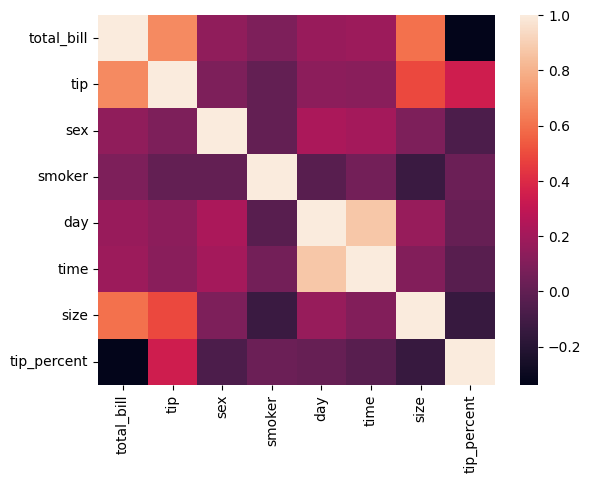

In [ ]:
correlation = df.corr()
sns.heatmap(correlation)

In [ ]:
correlation

,total_bill,tip,sex,smoker,day,time,size,tip_percent
total_bill,1.000000,0.675734,0.144877,0.085721,0.173693,0.183118,0.598315,-0.338624
tip,0.675734,1.000000,0.088862,0.005929,0.135499,0.121629,0.489299,0.342370
sex,0.144877,0.088862,1.000000,0.002816,0.230791,0.205231,0.086195,-0.069475
smoker,0.085721,0.005929,0.002816,1.000000,-0.032653,0.054921,-0.133178,0.030820
day,0.173693,0.135499,0.230791,-0.032653,1.000000,0.874366,0.165350,0.013493
time,0.183118,0.121629,0.205231,0.054921,0.874366,1.000000,0.103411,-0.033914
size,0.598315,0.489299,0.086195,-0.133178,0.165350,0.103411,1.000000,-0.142860
tip_percent,-0.338624,0.342370,-0.069475,0.030820,0.013493,-0.033914,-0.142860,1.000000


## 5. Logistic Regression

### separating features and target

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,0,0,4,2,2,5.944673
1,10.34,1.66,1,0,4,2,3,16.054159
2,21.01,3.50,1,0,4,2,3,16.658734
3,23.68,3.31,1,0,4,2,2,13.978041
4,24.59,3.61,0,0,4,2,4,14.680765


In [ ]:
X = df.drop('time', axis=1)
X.head()

,total_bill,tip,sex,smoker,day,size,tip_percent
0,16.99,1.01,0,0,4,2,5.944673
1,10.34,1.66,1,0,4,3,16.054159
2,21.01,3.50,1,0,4,3,16.658734
3,23.68,3.31,1,0,4,2,13.978041
4,24.59,3.61,0,0,4,4,14.680765


In [ ]:
y = df['time']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: time, dtype: category
Categories (2, int64): [1, 2]

In [ ]:
X.shape

(244, 7)

In [ ]:
y.shape

(244,)

### Splitting train and test chunks

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

,total_bill,tip,sex,smoker,day,size,tip_percent
7,26.88,3.12,1,0,4,4,11.607143
83,32.68,5.00,1,1,1,2,15.299878
176,17.89,2.00,1,1,4,2,11.179430
106,20.49,4.06,1,1,3,2,19.814544
156,48.17,5.00,1,0,4,6,10.379905


In [ ]:
X_train.shape

(195, 7)

In [ ]:
X_test.shape

(49, 7)

In [ ]:
y_train.shape

(195,)

In [ ]:
y_test.shape

(49,)

### Training

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X = X_train, y = y_train)

LogisticRegression()

### Testing

In [ ]:
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2])

### Model evaluation

#### 1. Accuracy
accuracy is an evaluation metric that tells how many occurances the model has predicted right.


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = round((accuracy_score(y_true = y_test, y_pred = logistic_reg_pred)), 4)
accuracy


0.898

<Axes: >

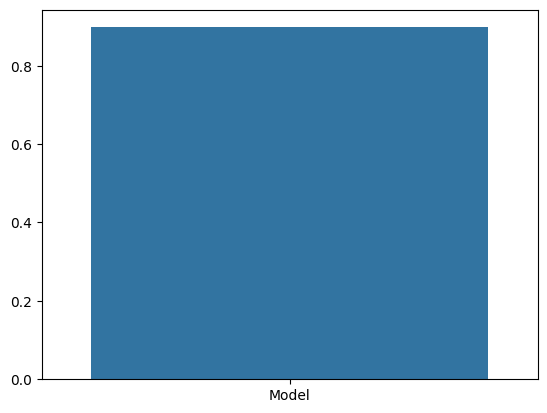

In [ ]:
# prompt: visualize the accuracy of model

sns.barplot(x=['Model'], y=[accuracy])


Checking other evaluation metrics like precision and recall because target feature has imbalanced classes: dinner and lunch, so accuracy is not a good measure here.


#### 2. Precision:
The precision is the ratio tp / (tp + fp).

- The precision is
intuitively the ability of the classifier not to label as positive a sample that is negative.
- minimize fp
- The best value is 1 and the worst value is 0.
- how often the model is correct when predicting the positive class

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_true = y_test, y_pred = logistic_reg_pred)
precision*100   # percentage

90.9090909090909

#### 3. Recall:
The recall is the ratio tp / (tp + fn).

- The recall is
intuitively the ability of the classifier to find all the positive samples.
- minimize fn
- The best value is 1 and the worst value is 0.
- measures whether a model can find all instances of the target class

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_true = y_test, y_pred = logistic_reg_pred)
round((recall*100), 2)   # percentage

71.43

#### 4. F1 score:
- harmonic mean of precision and recall
- balances the tradeoff between precision and recall

In [ ]:
# prompt: calculate f1 score

from sklearn.metrics import f1_score
f1_score = f1_score(y_true = y_test, y_pred = logistic_reg_pred)
round((f1_score*100), 2)   # percentage


80.0

#### 5. Confusion matrix
- tells the tp, tn, fp, fn

In [ ]:
# prompt: calculate confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, logistic_reg_pred)
print(cm)


[[10  4]
 [ 1 34]]


## Decision Tree Classifier

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,0,0,4,2,2,5.944673
1,10.34,1.66,1,0,4,2,3,16.054159
2,21.01,3.50,1,0,4,2,3,16.658734
3,23.68,3.31,1,0,4,2,2,13.978041
4,24.59,3.61,0,0,4,2,4,14.680765


### separate features and target

In [ ]:
X = df.drop(columns = 'time', axis=1)
y = df['time']
X.head()

,total_bill,tip,sex,smoker,day,size,tip_percent
0,16.99,1.01,0,0,4,2,5.944673
1,10.34,1.66,1,0,4,3,16.054159
2,21.01,3.50,1,0,4,3,16.658734
3,23.68,3.31,1,0,4,2,13.978041
4,24.59,3.61,0,0,4,4,14.680765


### train_test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [ ]:
X_train

,total_bill,tip,sex,smoker,day,size,tip_percent
144,16.43,2.30,0,0,1,2,13.998783
154,19.77,2.00,1,0,4,4,10.116338
184,40.55,3.00,1,1,4,2,7.398274
161,12.66,2.50,1,0,4,2,19.747235
44,30.40,5.60,1,0,4,4,18.421053
...,...,...,...,...,...,...,...
22,15.77,2.23,0,0,3,2,14.140774
72,26.86,3.14,0,1,3,2,11.690246
237,32.83,1.17,1,1,3,2,3.563814
15,21.58,3.92,1,0,4,2,18.164968


In [ ]:
y_train

144    1
154    2
184    2
161    2
44     2
      ..
22     2
72     2
237    2
15     2
168    2
Name: time, Length: 195, dtype: category
Categories (2, int64): [1, 2]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_cls = DecisionTreeClassifier()

### Training

In [ ]:
dec_tree_cls.fit(X_train, y_train)

DecisionTreeClassifier()

### Testing

In [ ]:
dec_tree_pred = dec_tree_cls.predict(X_test)

### Evaluation

#### Accuracy

In [ ]:
accuracy = accuracy_score(y_test, dec_tree_pred)
round((accuracy), 4)

0.9184

#### Precision

In [ ]:
precision = precision_score(y_test, dec_tree_pred)
round((precision), 4)

0.8462

#### Recall

In [ ]:
recall  = recall_score(y_test, dec_tree_pred)
recall

0.8461538461538461

#### F1 score

In [ ]:
from sklearn.metrics import f1_score

f1_score = f1_score(y_true = y_test, y_pred = dec_tree_pred)
round((f1_score*100), 2)

84.62

#### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dec_tree_pred)

## Random Forest Classifier

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,0,0,4,2,2,5.944673
1,10.34,1.66,1,0,4,2,3,16.054159
2,21.01,3.50,1,0,4,2,3,16.658734
3,23.68,3.31,1,0,4,2,2,13.978041
4,24.59,3.61,0,0,4,2,4,14.680765


In [ ]:
X = df.drop('time', axis=1)
y = df['time']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_forest_cls = RandomForestClassifier()

In [ ]:
rand_forest_cls.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rand_forest_pred = rand_forest_cls.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, rand_forest_pred)
precision = precision_score(y_test, rand_forest_pred)
recall = recall_score(y_test, rand_forest_pred)
f1 = f1_score(y_test, rand_forest_pred)
cm = confusion_matrix(y_test, rand_forest_pred)

print(f"accuracy: {accuracy}\n precision: {precision}\n recall: {recall}\n f1: {f1}\n cm: \n{cm}")

accuracy: 0.9387755102040817
 precision: 0.8571428571428571
 recall: 0.9230769230769231
 f1: 0.888888888888889
 cm: 
[[12  1]
 [ 2 34]]


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_cls = GradientBoostingClassifier()

In [ ]:
grad_boost_cls.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
grad_boost_cls_pred = grad_boost_cls.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, grad_boost_cls_pred)
precision = precision_score(y_test, grad_boost_cls_pred)
recall = recall_score(y_test, grad_boost_cls_pred)
f1 = f1_score(y_test, grad_boost_cls_pred)
cm = confusion_matrix(y_test, grad_boost_cls_pred)

print(f"accuracy: {accuracy}\n precision: {precision}\n recall: {recall}\n f1: {f1}\n cm: \n{cm}")

accuracy: 0.9183673469387755
 precision: 0.8461538461538461
 recall: 0.8461538461538461
 f1: 0.8461538461538461
 cm: 
[[11  2]
 [ 2 34]]


## Linear Support Vector Machine

In [ ]:
from sklearn import svm
svm_cls = svm.SVC(kernel = 'linear') # linear SVC

In [ ]:
svm_cls.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svm_cls_pred = svm_cls.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, svm_cls_pred)
precision = precision_score(y_test, svm_cls_pred)
recall = recall_score(y_test, svm_cls_pred)
f1 = f1_score(y_test, svm_cls_pred)
cm = confusion_matrix(y_test, svm_cls_pred)

print(f"accuracy: {accuracy}\n precision: {precision}\n recall: {recall}\n f1: {f1}\n cm: \n{cm}")

accuracy: 0.9591836734693877
 precision: 1.0
 recall: 0.8461538461538461
 f1: 0.9166666666666666
 cm: 
[[11  2]
 [ 0 36]]


## Comparing all classifiers

In [ ]:
# prompt: store all the models and their accuracies in a dataframe named df_scores

models = [logistic_reg,
          dec_tree_cls,
          rand_forest_cls,
          grad_boost_cls,
          svm_cls]

model_names = ['Logistic Regression',
               'Decision Tree Classifier',
               'Random Forest Classifier',
               'Gradient Boosting Classifier',
               'Linear Support Vector Machine']

accuracies = [accuracy_score(y_test, logistic_reg_pred),
              accuracy_score(y_test, dec_tree_pred),
              accuracy_score(y_test, rand_forest_pred),
              accuracy_score(y_test, grad_boost_cls_pred),
              accuracy_score(y_test, svm_cls_pred)]

df_scores = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
df_scores


,Model,Accuracy
0,Logistic Regression,0.551020
1,Decision Tree Classifier,0.918367
2,Random Forest Classifier,0.938776
3,Gradient Boosting Classifier,0.918367
4,Linear Support Vector Machine,0.959184


<ipython-input-93-4eccc69cf824>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_scores, x = 'Accuracy', y = 'Model', palette = 'Blues')


<Axes: xlabel='Accuracy', ylabel='Model'>

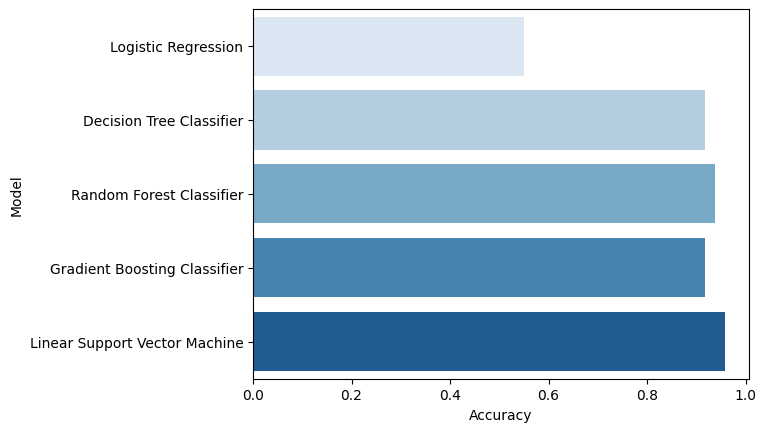

In [ ]:
sns.barplot(data = df_scores, x = 'Accuracy', y = 'Model', palette = 'Blues')